# Opening a New Gym in New York

### Introduction
I am creating this report in order to potentially help future companies, both first-time owners and those with existing gyms already, decide what area of New York is most suitable for the opening of a new Gym. Whilst there are many gyms currently open within the city of New York there is only just over 1 gym per 10,000 people according to (https://time.com/4082252/americas-fittest-places/). This is far from a completely saturated market, and gym memberships across the US continue to rise (https://www.wellnesscreatives.com/gym-market-statistics/).   

When trying to determine the best location to open a new gym, there are a number of factors to consider: 
- Existing gym locations - areas of high density are likely to already be saturated
- Existing gym locations - areas of low density could be as a result of low demand 
- Cost - floor space rent

    
### Data
In order to assess where would be most suitable, I shall be using the Foursquare API to determine existing gym locations and to evaluate density of gyms for a given neighbourhood. I will also use k-means clustering in order to group areas of New York into areas that are similar to each other. This will help determine suitable locations when combined with the gym density data, as if a neighbourhood is found to be similar to another in most aspects, but has a lower gym density, then it is possible that there is an opportunity to open one there. 

In addition, I shall incorporate the cost of floor space into my analysis to see if there are places without existing gyms simply due to economic factors. I shall be using the rent data from the following website (https://www.squarefoot.com/ny/new-york/office-space). Whilst this contains the price per sq ft of rental for office space, I will assume it is reflective of the relative expense of each area. Therefore it will be used more as an indicator of cost, rather than a specific value. The table also contains 2 Grades of office space with an average for each grade. For the purposes of this report, I will conduct analysis using both Grades. I shall also be making the assumption that the new gym will be 2000 sq ft in size.


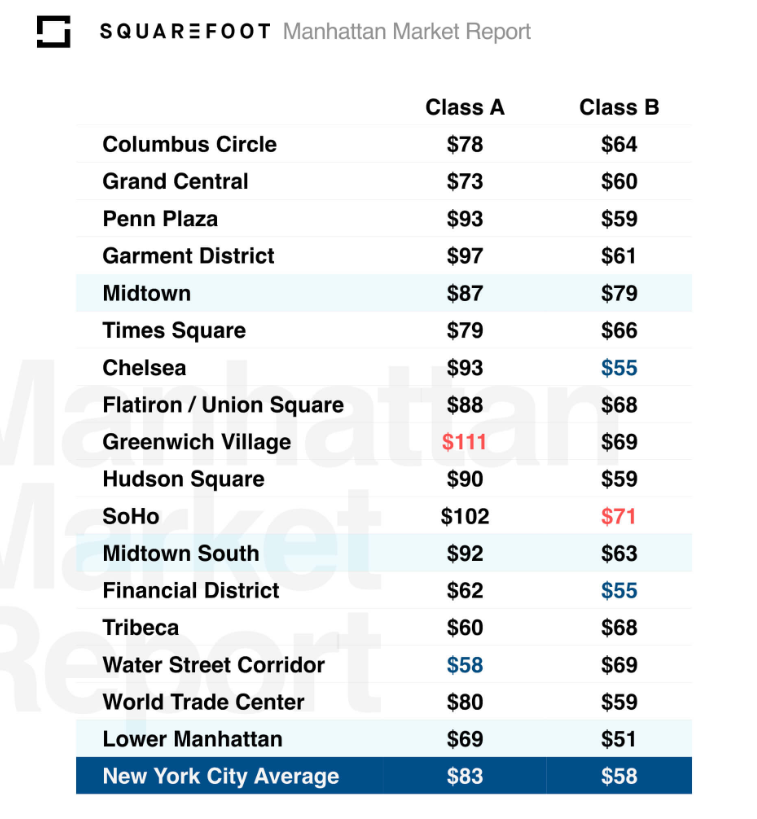

 
 These 3 pieces of analysis should help give prospective individuals or companies a good starting point when assessing which areas of New York to focus on.

## Methodology
This section will contain all of the code and analysis needed to produce the final report and presentation. I will be explaining my thought process and reasonings throughout in order to provide context and clarity on how I achieve the end results.

To begin with, I will be using the Foursquare API to return all the Gyms within New York.

#### Importing all relevant libraries and packages:

In [13]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import json

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import requests # library to handle requests

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')
    
    

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


#### Defining credentials:

In [2]:
CLIENT_ID = 'QQN0B3EZ2WBFKZTEJDCEARLP2VDFYILBDU5SRPCR4NOMWGM0' # your Foursquare ID
CLIENT_SECRET = 'PAL42XFACEWF01NY3JXUZHCYF1U0NUHDZYWBETBFGD5GPMP3' # your Foursquare Secret
VERSION = '20200420' #20180604
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QQN0B3EZ2WBFKZTEJDCEARLP2VDFYILBDU5SRPCR4NOMWGM0
CLIENT_SECRET:PAL42XFACEWF01NY3JXUZHCYF1U0NUHDZYWBETBFGD5GPMP3


In [5]:
#Defining lat and long coords of New York to centre map and Foursqaure search around

latitude = 40.7128
longitude = -74.0060

#### Return list of gyms within 10km of central New York

In [6]:
categoryId = '4bf58dd8d48988d175941735' #ID for Gym/Fitness centre category
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QQN0B3EZ2WBFKZTEJDCEARLP2VDFYILBDU5SRPCR4NOMWGM0&client_secret=PAL42XFACEWF01NY3JXUZHCYF1U0NUHDZYWBETBFGD5GPMP3&ll=40.7128,-74.006&v=20200420&categoryId=4bf58dd8d48988d175941735&radius=10000&limit=100'

#### Send the GET request and convert the results to a dataframe:

In [7]:
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,location.crossStreet,venuePage.id
0,58a253c830ecc66c9e5b40a0,The Class by Taryn Toomey,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1587550591,False,22 Park Pl,40.712753,-74.008734,"[{'label': 'display', 'lat': 40.71275251771485...",230,10007,US,New York,NY,United States,"[22 Park Pl, New York, NY 10007, United States]",NaN,NaN,NaN
1,4f491eaa003968ac97e36f4a,85 Adams St. Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1587550591,False,85 Adams St,40.701579,-73.987979,"[{'label': 'display', 'lat': 40.70157879942615...",1967,11201,US,Brooklyn,NY,United States,"[85 Adams St, Brooklyn, NY 11201, United States]",NaN,NaN,NaN
2,4ba93c43f964a520e5163ae3,Prospect Park Loop,"[{'id': '4bf58dd8d48988d106941735', 'name': 'T...",v-1587550591,False,Grand Army Plaza,40.670994,-73.970340,"[{'label': 'display', 'lat': 40.670994, 'lng':...",5542,11215,US,Brooklyn,NY,United States,"[Grand Army Plaza, Brooklyn, NY 11215, United ...",Prospect Park,NaN,NaN
3,5086f9d2e4b0f46229b01d95,West Side Highway Running Path,"[{'id': '4bf58dd8d48988d106941735', 'name': 'T...",v-1587550591,False,West Side Highway,40.762031,-74.001066,"[{'label': 'display', 'lat': 40.76203139867169...",5496,10036,US,New York,NY,United States,"[West Side Highway (12th Ave), New York, NY 10...",NaN,12th Ave,NaN
4,5e73c2f33f6d3c0007977b5f,this must be the (new) studio,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",v-1587550591,False,525 Vanderbilt Ave,40.682511,-73.967472,"[{'label': 'display', 'lat': 40.682511, 'lng':...",4684,11238,US,New York,NY,United States,"[525 Vanderbilt Ave, New York, NY 11238, Unite...",NaN,NaN,NaN


In [8]:
dataframe.shape

(50, 19)

#### Foursquare has only returned 50 Gym venues in New York which is a lot less than expected but we will have to make do with that. Next step is to clean the dataframe and show the locations on a map to visualise the spread of venues. 

In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,The Class by Taryn Toomey,Gym / Fitness Center,22 Park Pl,40.712753,-74.008734,"[{'label': 'display', 'lat': 40.71275251771485...",230,10007,US,New York,NY,United States,"[22 Park Pl, New York, NY 10007, United States]",NaN,NaN,58a253c830ecc66c9e5b40a0
1,85 Adams St. Gym,Gym,85 Adams St,40.701579,-73.987979,"[{'label': 'display', 'lat': 40.70157879942615...",1967,11201,US,Brooklyn,NY,United States,"[85 Adams St, Brooklyn, NY 11201, United States]",NaN,NaN,4f491eaa003968ac97e36f4a
2,Prospect Park Loop,Track,Grand Army Plaza,40.670994,-73.970340,"[{'label': 'display', 'lat': 40.670994, 'lng':...",5542,11215,US,Brooklyn,NY,United States,"[Grand Army Plaza, Brooklyn, NY 11215, United ...",Prospect Park,NaN,4ba93c43f964a520e5163ae3
3,West Side Highway Running Path,Track,West Side Highway,40.762031,-74.001066,"[{'label': 'display', 'lat': 40.76203139867169...",5496,10036,US,New York,NY,United States,"[West Side Highway (12th Ave), New York, NY 10...",NaN,12th Ave,5086f9d2e4b0f46229b01d95
4,this must be the (new) studio,Yoga Studio,525 Vanderbilt Ave,40.682511,-73.967472,"[{'label': 'display', 'lat': 40.682511, 'lng':...",4684,11238,US,New York,NY,United States,"[525 Vanderbilt Ave, New York, NY 11238, Unite...",NaN,NaN,5e73c2f33f6d3c0007977b5f


In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Central London

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Central New York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Gyms as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Loading in Neighbourhood data set from the labs to assess neighbourhood similarity

In [11]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [14]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [15]:
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Create map of New York showing the neighbourhoods

In [16]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### As this is quite messy, lets limit the search to neighbourhoods within Manhattan

In [19]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [20]:
# number of venues returned per neighbourhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,56,56,56,56,56,56
Carnegie Hill,86,86,86,86,86,86
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,89,89,89,89,89,89
Clinton,100,100,100,100,100,100
East Harlem,43,43,43,43,43,43
East Village,100,100,100,100,100,100


#### Use onehot encoding to analyse each neighbourhood

In [21]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,

In [22]:
#group rows by neighbourhood
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [23]:
#print each neighbourhood along with top 5 venues
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.11
1            Gym  0.07
2          Hotel  0.07
3  Memorial Site  0.05
4      Wine Shop  0.04


----Carnegie Hill----
                  venue  freq
0           Coffee Shop  0.09
1                  Café  0.05
2           Yoga Studio  0.03
3  Gym / Fitness Center  0.03
4             Bookstore  0.03


----Central Harlem----
                  venue  freq
0  Gym / Fitness Center  0.04
1    Chinese Restaurant  0.04
2    African Restaurant  0.04
3   American Restaurant  0.04
4   Fried Chicken Joint  0.04


----Chelsea----
                venue  freq
0         Art Gallery  0.13
1         Coffee Shop  0.07
2      Ice Cream Shop  0.03
3  Italian Restaurant  0.03
4           Bookstore  0.02


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.07
1              Bakery  0.05
2        Cocktail Bar  0.04
3         Coffee Shop  0.03
4                 Bar  0.03


----Civic Center----
               venue  freq
0  

In [24]:
#convert to pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
#creating top 10 venues dataframe for each neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Memorial Site,Boat or Ferry,Gourmet Shop,Food Court,Plaza,Shopping Mall,Burger Joint
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Pizza Place,Bakery,Bar,Bookstore,Gym,Gym / Fitness Center,Japanese Restaurant
2,Central Harlem,Gym / Fitness Center,Chinese Restaurant,African Restaurant,American Restaurant,Seafood Restaurant,Bar,Cosmetics Shop,French Restaurant,Fried Chicken Joint,Boutique
3,Chelsea,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Juice Bar,Market,Park,Cycle Studio,Cupcake Shop
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Spa,Optical Shop,Bar,Coffee Shop,Salon / Barbershop,Sandwich Place


#### Using K-means clustering to group similar neighbourhoods together


In [27]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Spa,Optical Shop,Bar,Coffee Shop,Salon / Barbershop,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Café,Bakery,Pizza Place,Mobile Phone Shop,Bank,Chinese Restaurant,Grocery Store,Donut Shop,Park,New American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Café,Pizza Place,Restaurant,Lounge,Bakery,American Restaurant,Wine Bar,Park,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Park,Yoga Studio


#### Visualise the clusters in order to determine neighbourhoods that are similar

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Display each cluster in order to determine which groups of neighbourhoods would be most suited to implementing a new gym:

#### Cluster 1

In [29]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Spa,Optical Shop,Bar,Coffee Shop,Salon / Barbershop,Sandwich Place
6,Central Harlem,Gym / Fitness Center,Chinese Restaurant,African Restaurant,American Restaurant,Seafood Restaurant,Bar,Cosmetics Shop,French Restaurant,Fried Chicken Joint,Boutique
14,Clinton,Theater,Gym / Fitness Center,Coffee Shop,Spa,Wine Shop,Gym,Sandwich Place,Cocktail Bar,Pizza Place,Italian Restaurant
16,Murray Hill,Sandwich Place,Gym / Fitness Center,Bar,Hotel,Burger Joint,Pizza Place,Sushi Restaurant,Grocery Store,Japanese Restaurant,Indian Restaurant
17,Chelsea,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Juice Bar,Market,Park,Cycle Studio,Cupcake Shop
19,East Village,Pizza Place,Bar,Cocktail Bar,Coffee Shop,Juice Bar,Vietnamese Restaurant,Japanese Restaurant,Filipino Restaurant,Salon / Barbershop,Mexican Restaurant
20,Lower East Side,Park,Art Gallery,Pizza Place,Bakery,Café,Chinese Restaurant,Cocktail Bar,Yoga Studio,Juice Bar,Latin American Restaurant
25,Manhattan Valley,Yoga Studio,Bar,Pizza Place,Thai Restaurant,Bakery,Bubble Tea Shop,Playground,American Restaurant,Peruvian Restaurant,Park
27,Gramercy,Italian Restaurant,Pizza Place,Coffee Shop,Playground,Bar,Ice Cream Shop,Cocktail Bar,Grocery Store,Diner,Sandwich Place
29,Financial District,Coffee Shop,Hotel,Gym / Fitness Center,Café,Pizza Place,Cocktail Bar,Falafel Restaurant,Gym,American Restaurant,Mexican Restaurant


#### Cluster 2

In [30]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Japanese Restaurant,Gym / Fitness Center,Hotel Bar,Dessert Shop,Burger Joint,Café,Donut Shop,Grocery Store


#### Cluster 3

In [31]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
2,Washington Heights,Café,Bakery,Pizza Place,Mobile Phone Shop,Bank,Chinese Restaurant,Grocery Store,Donut Shop,Park,New American Restaurant
3,Inwood,Mexican Restaurant,Café,Pizza Place,Restaurant,Lounge,Bakery,American Restaurant,Wine Bar,Park,Frozen Yogurt Shop
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Park,Yoga Studio
5,Manhattanville,Coffee Shop,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,Deli / Bodega,Fried Chicken Joint,Park,Gastropub,Lounge,Sushi Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Sandwich Place,Gas Station,Seafood Restaurant,Taco Place,Street Art
11,Roosevelt Island,Park,Bubble Tea Shop,Scenic Lookout,Liquor Store,Supermarket,Bus Line,Farmers Market,Soccer Field,Dry Cleaner,School
26,Morningside Heights,Park,Bookstore,American Restaurant,Coffee Shop,Deli / Bodega,Burger Joint,Tennis Court,Ice Cream Shop,New American Restaurant,Supermarket
36,Tudor City,Park,Café,Mexican Restaurant,Deli / Bodega,Pizza Place,Gym / Fitness Center,Greek Restaurant,Garden,Dog Run,Diner


#### Cluster 4

In [32]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Bakery,Exhibit,Gym / Fitness Center,Spa,American Restaurant,Coffee Shop,Cosmetics Shop,Juice Bar,Pizza Place
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Bar,Deli / Bodega,Sushi Restaurant,Pizza Place,Japanese Restaurant,Mexican Restaurant,Wine Shop
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Café,Burger Joint,Gym / Fitness Center,Gym,Sporting Goods Shop
12,Upper West Side,Italian Restaurant,Coffee Shop,Wine Bar,Bakery,Bookstore,Bar,Thai Restaurant,Bagel Shop,Mediterranean Restaurant,Middle Eastern Restaurant
13,Lincoln Square,Plaza,Gym / Fitness Center,Café,Italian Restaurant,Theater,Performing Arts Venue,Concert Hall,American Restaurant,Wine Shop,Indie Movie Theater
15,Midtown,Hotel,Coffee Shop,Clothing Store,Theater,Mediterranean Restaurant,Pizza Place,Cuban Restaurant,Gym,Spa,Bakery
18,Greenwich Village,Italian Restaurant,Coffee Shop,Café,Wine Bar,Sushi Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Park,Mediterranean Restaurant
21,Tribeca,Italian Restaurant,Park,Wine Bar,Café,Spa,American Restaurant,Greek Restaurant,Coffee Shop,Hotel,Art Gallery
22,Little Italy,Chinese Restaurant,Italian Restaurant,Bakery,Spa,Bubble Tea Shop,Mediterranean Restaurant,Thai Restaurant,Cosmetics Shop,Hotel,Cocktail Bar
23,Soho,Italian Restaurant,Coffee Shop,Mediterranean Restaurant,Café,Gym,French Restaurant,Dessert Shop,Clothing Store,Bakery,Art Gallery


#### Cluster 5

In [33]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,Pet Service,Gas Station,Farmers Market,Gym / Fitness Center,Baseball Field,Harbor / Marina,Cocktail Bar


# Recommendation based on results

My recommendation for the opening of a new gym, is the East Harlem district of Manhattan. This is due to it not currently having a gym located within the neighbourhood, along with being clustered with other similar neighbourhoods that do have a number of gyms already. Therefore it is reasonable to assume that a new gym within East Harlem would be attractive to current residents and would be successful. Even though the cost of office space of around (93 USD) per sq ft for a Grade A rent is above the New York average by a significant amount, the price for Grade B rent is essentially equal to the average (59 USD) for the whole of New York and therefore would not be prohibitive from an economic stand point. 

With the assumed gym size, that places the total cost of rent at just over 100.000 USD per year. 